In [2]:
import tensorflow as tf
import numpy as np
import sklearn
import keras

2024-10-29 16:55:18.012752: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 16:55:18.024848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730188518.038908 1618418 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730188518.042857 1618418 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 16:55:18.058718: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train /255.0 , X_test / 255.0

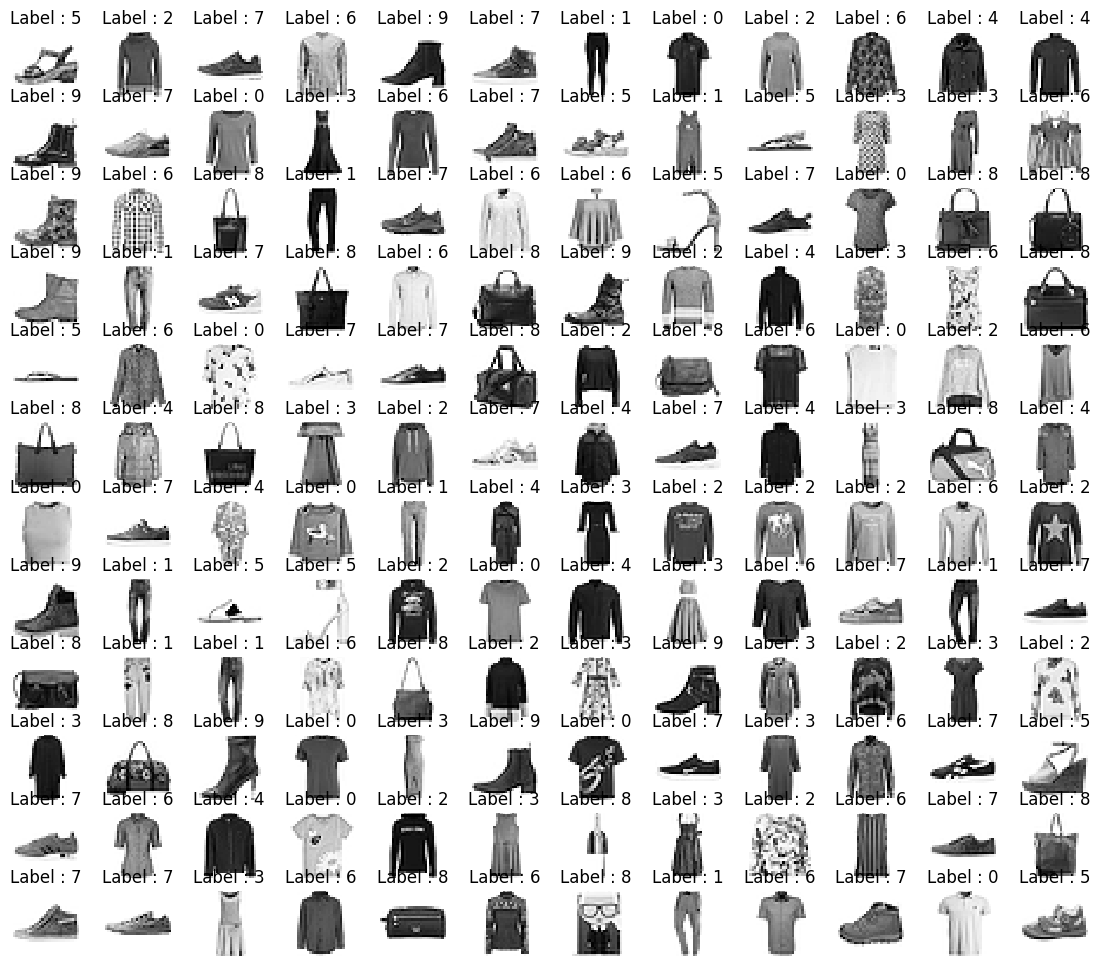

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

sample_size = 12

samples = random.choices(population=range(0,len(y_train)), k=sample_size**2)
plt. figure(figsize=(14,12))

for idx, n in enumerate(samples) :
    plt.subplot(sample_size, sample_size, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]) )
    plt.axis('off')

plt. show()


In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=1000 , activation= 'relu'),
    tf.keras.layers.Dense(units=500 , activation= 'relu'),
    tf.keras.layers.Dense(units= 250, activation= 'softmax')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss = 'sparse_categorical_crossentropy', # allows to use INTEGER labels without OHEncoding (each means to use on categorical samples)
              metrics = ['accuracy'])

model.summary()

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=2000 , activation= 'relu'),
    tf.keras.layers.Dense(units=1000 , activation= 'relu'),
    tf.keras.layers.Dense(units= 500, activation= 'softmax')
])
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = 'sparse_categorical_crossentropy', # allows to use INTEGER labels without OHEncoding (each means to use on categorical samples)
              metrics = ['accuracy'])

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=100 , activation= 'relu'),
    tf.keras.layers.Dense(units=100 , activation= 'relu'),
    tf.keras.layers.Dense(units=10, activation= 'softmax')
])
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss = 'sparse_categorical_crossentropy', # allows to use INTEGER labels without OHEncoding (each means to use on categorical samples)
              metrics = ['accuracy'])

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=10 , activation= 'relu'),
    tf.keras.layers.Dense(units=6 , activation= 'relu'),
    tf.keras.layers.Dense(units=2, activation= 'softmax')
])
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss = 'sparse_categorical_crossentropy', # allows to use INTEGER labels without OHEncoding (each means to use on categorical samples)
              metrics = ['accuracy'])


/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 250)            │       125,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,410,750 (5.38 MB)

 Trainable params: 1,410,750 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
hist = model.fit(X_train, y_train , validation_data=(X_test, y_test),
                 epochs=10,
                 batch_size = 100,
                 verbose=1)

hist2 = model2.fit(X_train, y_train , validation_data=(X_test, y_test),
                 epochs=16,
                 batch_size = 10000, # ex) 60,000 data with 10,000 batch will run 6 times
                 verbose=1)

hist3 = model3.fit(X_train, y_train , validation_data=(X_test, y_test),
                 epochs=100,
                 batch_size = 10,
                 verbose=2)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8598 - loss: 0.4051 - val_accuracy: 0.8501 - val_loss: 0.4279
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8715 - loss: 0.3680 - val_accuracy: 0.8611 - val_loss: 0.3816
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8814 - loss: 0.3373 - val_accuracy: 0.8599 - val_loss: 0.3873
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8819 - loss: 0.3269 - val_accuracy: 0.8637 - val_loss: 0.3717
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8915 - loss: 0.3032 - val_accuracy: 0.8740 - val_loss: 0.3577
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8986 - loss: 0.2841 - val_accuracy: 0.8784 - val_loss: 0.3312
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9016 - loss: 0.2707 - val_accuracy: 0.8751 - val_loss: 0.3375
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9062 - loss: 0.2544 - val_accu

2024-10-29 17:29:20.469024: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 9 which is outside the valid range of [0, 2).  Label values: 2 1 8 2 8 0 7 9 4 7 7 0 8 7 7 1 3 7 6 7 1 8 5 0 2 2 0 7 2 0 6 0 2 6 6 7 0 0 6 2 0 6 8 0 5 6 3 4 6 7 1 0 5 1 7 2 0 3 7 0 9 0 8 9 0 5 2 1 3 6 1 6 5 8 4 4 1 8 7 7 5 0 6 4 5 9 9 6 1 1 6 6 3 6 5 1 7 3 4 8 0 6 7 9 7 5 3 4 1 1 5 8 0 6 7 6 1 6 1 2 9 9 8 2 0 6 9 8 9 9 5 1 6 9 5 2 3 1 8 7 5 3 6 8 3 1 8 8 2 3 8 1 5 0 3 8 6 8 8 0 5 5 7 4 3 7 3 8 1 1 3 3 3 1 5 9 5 5 2 2 6 3 4 1 1 8 6 9 2 7 8 6 0 1 9 9 7 2 6 4
2024-10-29 17:29:20.469066: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 9 which is outside the valid range of [0, 2).  Label values: 2 1 8 2 8 0 7 9 4 7 7 0 8 7 7 1 3 7 6 7 1 8 5 0 2 2 0 7 2 0 6 0 2 6 6 7 0 0 6 2 0 6 8 0 5 6 3 4 6 7 1 0 5 1 7 2 0 3 7 0 9 0 8 9 0 5 2 1 3 6 1 6 5 

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_1618418/2385984177.py", line 16, in <module>

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 398, in _compute_loss

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 366, in compute_loss

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 618, in __call__

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 659, in call

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 2).  Label values: 2 1 8 2 8 0 7 9 4 7 7 0 8 7 7 1 3 7 6 7 1 8 5 0 2 2 0 7 2 0 6 0 2 6 6 7 0 0 6 2 0 6 8 0 5 6 3 4 6 7 1 0 5 1 7 2 0 3 7 0 9 0 8 9 0 5 2 1 3 6 1 6 5 8 4 4 1 8 7 7 5 0 6 4 5 9 9 6 1 1 6 6 3 6 5 1 7 3 4 8 0 6 7 9 7 5 3 4 1 1 5 8 0 6 7 6 1 6 1 2 9 9 8 2 0 6 9 8 9 9 5 1 6 9 5 2 3 1 8 7 5 3 6 8 3 1 8 8 2 3 8 1 5 0 3 8 6 8 8 0 5 5 7 4 3 7 3 8 1 1 3 3 3 1 5 9 5 5 2 2 6 3 4 1 1 8 6 9 2 7 8 6 0 1 9 9 7 2 6 4
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1501166]

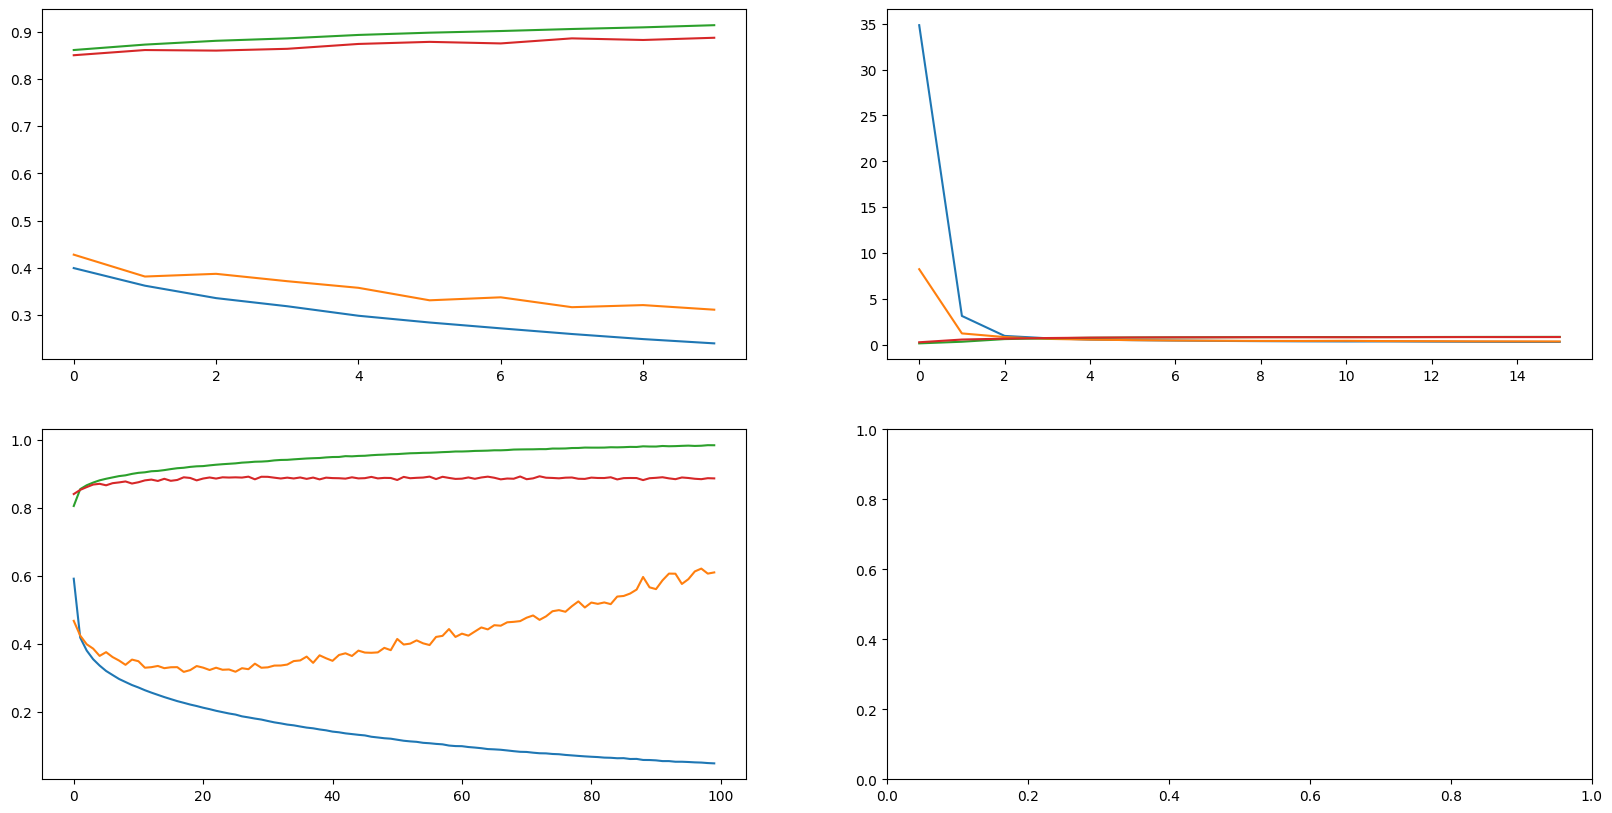

In [56]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']


fig , axs = plt.subplots(2,2, figsize=(20,10))


for each in plot_target:
    axs[0,0].plot(hist.history[each], label=each)

for each in plot_target:
    axs[0,1].plot(hist2.history[each], label=each)

for each in plot_target:
    axs[1,0].plot(hist3.history[each], label=each)

# for each in plot_target:
#     axs[1,1].plot(hist4.history[each], label=each)


plt.show()

In [60]:
score = model.evaluate(X_train, y_train)
score2 = model2.evaluate(X_train, y_train)
score3 = model3.evaluate(X_train, y_train)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9230 - loss: 0.2171
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8843 - loss: 0.3168
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.9869 - loss: 0.0410


In [66]:
print(f'model1\nTest loss: {score[0]}\nTest accuracy: {score[1]}\n')
print(f'model2\nTest loss: {score2[0]}\nTest accuracy: {score2[1]}\n')
print(f'model3\nTest loss: {score3[0]}\nTest accuracy: {score3[1]}\n')


model1
Test loss: 0.21966588497161865
Test accuracy: 0.9218999743461609

model2
Test loss: 0.3229641020298004
Test accuracy: 0.8801166415214539

model3
Test loss: 0.04116837680339813
Test accuracy: 0.9869999885559082



In [68]:
pred_result = model.predict(X_test)
pred_labels = np.argmax(pred_result, axis=1)
pred_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])